# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

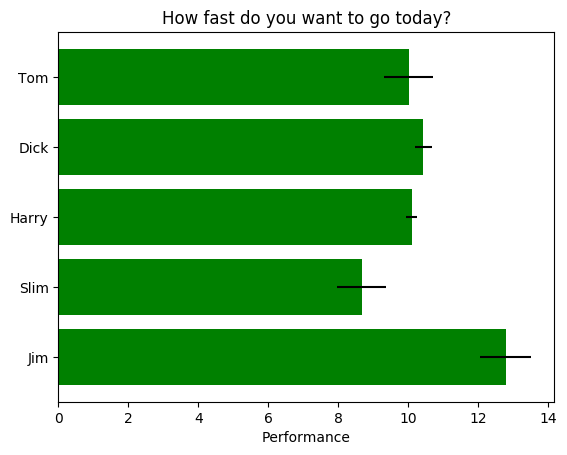

In [2]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

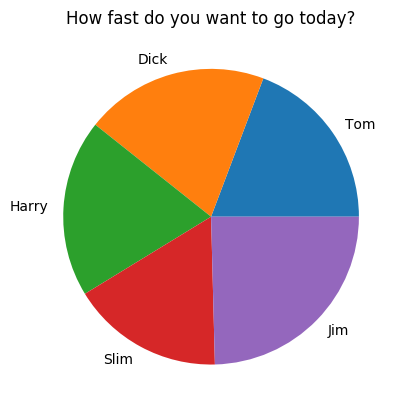

In [3]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

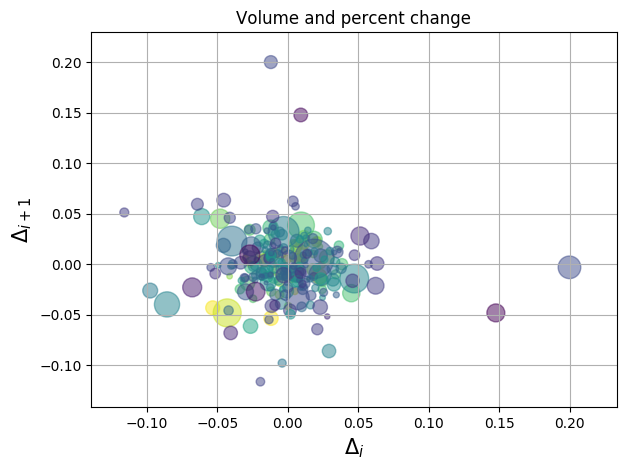

In [4]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

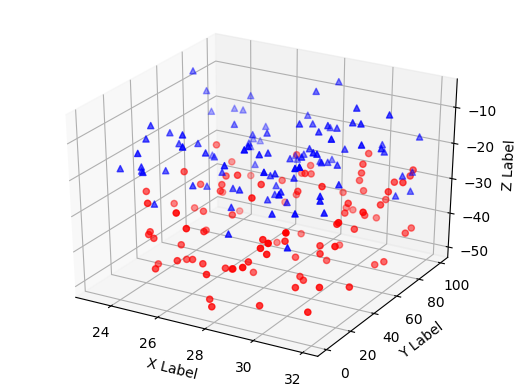

In [5]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



In [0]:
# TODO - fun, possibly interactive plots!

# first I'll pull in my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

In [7]:
# Now I'll upload my data
from google.colab import files
uploaded = files.upload()

In [8]:
df = pd.read_csv('north_korea_missile_test_database.csv')
df.head()

,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Additional Information,Source(s)
0,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,First known test by North Korea of a missile w...,http://www.nti.org/media/pdfs/north_korea_miss...
1,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...
2,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200 km,Unknown,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...
3,Sep-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi..."
4,Sep-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200 km,Unknown,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...


In [37]:
df.date

0       9-Apr-84
1       9-Apr-84
2       9-Apr-84
3         Sep-84
4         Sep-84
5         Sep-84
6         May-86
7         May-90
8         Jun-90
9         Jul-91
10        Jun-92
11     29-May-93
12     29-May-93
13     29-May-93
14     30-May-93
15     31-Aug-98
16      5-Jul-06
17      5-Jul-06
18      5-Jul-06
19      5-Jul-06
20      5-Jul-06
21      5-Jul-06
22      5-Jul-06
23      5-Apr-09
24      5-Jul-09
25      5-Jul-09
26      5-Jul-09
27      5-Jul-09
28      5-Jul-09
29      5-Jul-09
         ...    
87     18-Jul-16
88     18-Jul-16
89      2-Aug-16
90      2-Aug-16
91     23-Aug-16
92      5-Sep-16
93      5-Sep-16
94      5-Sep-16
95     14-Oct-16
96     19-Oct-16
97     11-Feb-17
98      5-Mar-17
99      5-Mar-17
100     5-Mar-17
101     5-Mar-17
102    21-Mar-17
103     4-Apr-17
104    15-Apr-17
105    28-Apr-17
106    14-May-17
107    21-May-17
108    28-May-17
109     4-Jul-17
110    28-Jul-17
111    25-Aug-17
112    25-Aug-17
113    25-Aug-17
114    28-Aug-

In [80]:
# Now I'll implement all of my data cleaning from yesterday



# First I'll clean the colum names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '')

# and remove unknowns
df_masked = df.replace('Unknown', np.nan)

# and drop NAN rows in the lat/long categories
df_clean = df_masked.dropna(subset=['facility_longitude', 'facility_latitude', 'test_outcome'])
# df_clean.head()

s_to_b = {'Success' : True, 'Failure' : False}

df_clean['test_outcome'].replace(s_to_b, inplace=True)

# df_clean.test_outcome

# df_clean.filter(like='Success', axis=0)
# which(df_clean == "Success", arr.ind = TRUE)

# and convert to float
df_float = df_clean.astype({'facility_longitude':'float', 'facility_latitude':'float', 'missile_name': 'category' , 'missile_type':'category', 'facility_name':'category'})

df_float.dtypes


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


date                        object
date_enteredupdated         object
launch_time_utc             object
missile_name              category
missile_type              category
launch_agencyauthority      object
facility_name             category
facility_location           object
other_name                  object
facility_latitude          float64
facility_longitude         float64
landing_location            object
apogee                      object
distance_travelled          object
confirmation_status         object
test_outcome                  bool
additional_information      object
sources                     object
dtype: object

Now I can do some plotting with categories. 

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.


In [10]:
df_float.missile_name.value_counts()

Scud-C         26
KN-02          20
Nodong         16
Scud-B         10
Musudan         8
ER Scud         7
Polaris-1       6
Hwasong-12      6
Unha-3          3
Scud-B MaRV     3
Unha            2
Polaris-2       2
Hwasong-14      2
Taepodong-1     1
Scud-C MaRV     1
Hwasong-15      1
Name: missile_name, dtype: int64

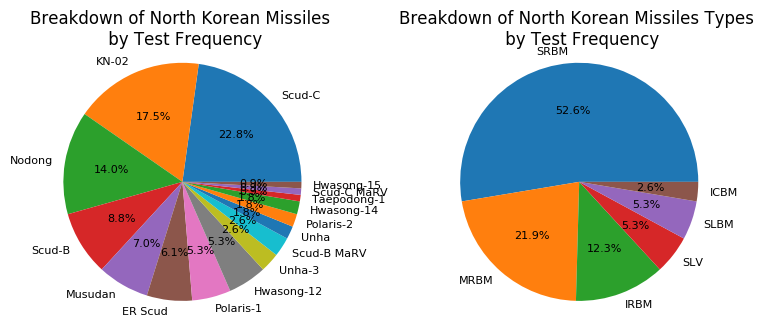

In [30]:
# Here are two pie charts showing the missile categories

plt.rcdefaults()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Example data
misn_q = df_float.missile_name.value_counts()
misn_labels = list(misn_q.index.values)

mist_q = df_float.missile_type.value_counts()
mist_labels = list(mist_q.index.values)

ax1.pie(misn_q, labels = misn_labels, radius=3, autopct='%1.1f%%', textprops={'fontsize': 8})
ax1.set_title('Breakdown of North Korean Missiles \n by Test Frequency', y=1.8)

ax2.pie(mist_q, labels = mist_labels, radius=3, autopct='%1.1f%%', textprops={'fontsize': 8})
ax2.set_title('Breakdown of North Korean Missiles Types \n by Test Frequency', y=1.8)

plt.subplots_adjust(wspace = 3)
plt.show()

These pie charts show that out of all the missle tests that North Korea performs, what % are using which missile and which categories of missile these tests fall into.

The most obvious takeaway is that the majority of tests are using SRBM, short range ballistic missiles that are tactical weapons, and therefore probably do not relate to the North Korean nuclear program. These missiles also can only be used to threaten South Korea and US military assets in the local area.

The leftmost chart also demonstrates that the north has 3 major missile systems that represent over 50% of their tests, this is to be expected from a small actor without the resources to maintain a large and diversified arsenal. Rather, the north probably has a large but relatively homogeneuos arsenal of missile systems based on this representation of their testing data.


In [0]:
# m_groups = df_float.missile_name.groupby(df_float.missile_type).value_counts()
# # m_groups.head()
# m_groups.drop(['missile_name'], inplace=True)
# m_groups.head()

In [0]:
plt.rcdefaults()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Example data
misn_q = df_float.missile_name.value_counts()
misn_labels = list(misn_q.index.values)

mist_q = df_float.missile_type.value_counts()
mist_labels = list(mist_q.index.values)

ax1.pie(misn_q, labels = misn_labels, radius=3, autopct='%1.1f%%', textprops={'fontsize': 8})
ax1.set_title('Breakdown of North Korean Missiles \n by Test Frequency', y=1.8)

ax2.pie(mist_q, labels = mist_labels, radius=3, autopct='%1.1f%%', textprops={'fontsize': 8})
ax2.set_title('Breakdown of North Korean Missiles Types \n by Test Frequency', y=1.8)

plt.subplots_adjust(wspace = 3)
plt.show()

In [0]:
# simple graph of missile type and success rate


I'm trying to make a nested pie chart down here but got stuck

ValueError: ignored

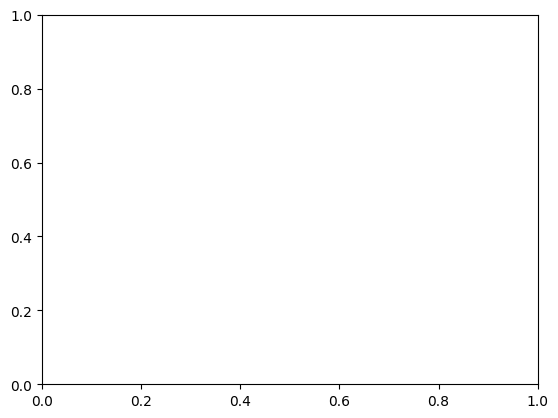

In [93]:
fig, ax = plt.subplots()

size = 0.3
vals = df_float.missile_name.groupby(df_float.missile_type).value_counts()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [81]:
df_float.missile_type.groupby(df_float.test_outcome).value_counts()

test_outcome  missile_type
False         IRBM            10
              MRBM             4
              SLV              4
              SRBM             4
              SLBM             3
True          SRBM            55
              MRBM            21
              ICBM             3
              IRBM             3
              SLBM             3
              SLV              2
Name: missile_type, dtype: int64

In [12]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...